In [1]:
# Importing the important libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


In [2]:
# Loading the dataset for the analysis
sample_df=pd.read_csv("E:\\Dataset\\crop_production.csv")

In [3]:
# data Visualization

sample_df.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0


In [4]:
# Fetching the full report of the data 
# summaries
# Report

import pandas_profiling as pp
pp.ProfileReport(sample_df)

Some of the output from thr Reports

1. We have 4 categorical variables(State_Name, District_Name, Season, Crop)
   3 continuos variables in integer(Crop_Year) and Float(Crop, Area)
2. We have null values only in production columns which counts to 3730 which is 1.5% of tatal sample size
3. By observing the Spearman's p there is No variable is showing high correlation with any othe variables in the dataset
4. Unique states count to 33
5. Area &  Production column are highly skewed with lot of outliers

In [5]:
sample_df.shape

(246091, 7)

# Dimensions of the dataset  
Rows 246091 
Columns 7

In [6]:
# Information about the dtype of the columns with null and non-null.

sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


### As we have also seen in Report above we have 
4 categorical variables(State_Name, District_Name, Season, Crop)
3 continuos variables in integer(Crop_Year) and Float(Crop, Area)

In [7]:
sample_df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [8]:
# Creating a copy for the data analysis

crop_df = sample_df.copy()

In [9]:
# Data Cleaning 
# Observing one columns at time 

list(crop_df.columns.values)


['State_Name',
 'District_Name',
 'Crop_Year',
 'Season',
 'Crop',
 'Area',
 'Production']

#### State_Name

In [10]:
crop_df.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [11]:
crop_df.State_Name.nunique()

33

In [12]:
# count of values in each state
crop_df.State_Name.value_counts()

Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                          957
P

In [13]:
crop_df.State_Name.isnull().sum()

0

##### Observation: 
There is no null value in State_Name Column. 
It contain 33 unique name of state. 
Top 5 states with most data are Uttar Pradesh, Madhya Pradesh, Karnataka, Bihar, Assam


##### Column 2: District_Name


In [14]:
crop_df.District_Name.unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [15]:
crop_df.District_Name.value_counts()

BIJAPUR      945
TUMKUR       936
BELGAUM      925
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
NAMSAI         1
MUMBAI         1
Name: District_Name, Length: 646, dtype: int64

In [16]:
crop_df.District_Name.isnull().sum()

0

Observation : 
    We have more data from Bijapur, Tumkur, Belgaum, Hassaan, Bellary these all five district belong to Karnataka
    We have least data from Hyderabad, Ramgarh, Khunti, Mumbai, Namsai

#### Column 3 :Crop_Year

In [17]:
crop_df.Crop_Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [18]:
crop_df.Crop_Year.nunique()

19

In [19]:
crop_df.Crop_Year.value_counts()

2003    17287
2002    16671
2008    14550
2007    14526
2006    14328
2004    14117
2009    14116
2011    14071
2010    14065
2005    13799
2000    13658
2013    13650
2012    13410
2001    13361
1999    12515
1998    11533
2014    10973
1997     8899
2015      562
Name: Crop_Year, dtype: int64

In [20]:
crop_df.Crop_Year.min()

1997

In [21]:
crop_df.Crop_Year.max()

2015

Observation: 
    We have 19 years of dataset 
    Year ranges from 1997 to 2015
    Top crop years are 2003, 2002, 2007 & 2008 have eaqual , 2006

#### Column 4: Season

In [22]:
crop_df.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [23]:
crop_df.Season.nunique()

6

In [24]:
crop_df.Season.value_counts()

Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: Season, dtype: int64

In [25]:
crop_df.Season.max()

'Winter     '

Observations :
    We have 6 crop seasons 
    Winter Crops with more crops yielding in Winter
    We have more data point from Kharif, Rabi and Whole Year crop variety

#### Column 5: Crop

In [26]:
crop_df.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Va

In [27]:
crop_df.Crop.nunique()

124

In [28]:
crop_df.Crop.max()

'other oilseeds'

In [29]:
crop_df.Crop.isnull().sum()

0

In [30]:
crop_df.Crop.value_counts().head()

Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
Name: Crop, dtype: int64

Observation: 
    Dataset have 124 different crop varieties
    Top 5 crops are Rice(15104), Maize(13947), Moong(10318), Urad(9850) and Sesamum(9046)
    

#### Column 5: Area

In [31]:
crop_df.Area.nunique()

38442

In [32]:
crop_df.Area.isnull().sum()

0

In [33]:
crop_df.Area.value_counts().head(10)

1.0      4553
2.0      3453
100.0    2824
3.0      2636
4.0      2273
5.0      2176
6.0      1830
200.0    1703
10.0     1630
7.0      1620
Name: Area, dtype: int64

In [34]:
crop_df.Area.max()

8580100.0

In [35]:
crop_df.Area.value_counts().tail(10)

21232.0     1
231031.0    1
20687.0     1
16220.0     1
231033.0    1
82749.0     1
41375.0     1
32213.0     1
50170.0     1
15374.0     1
Name: Area, dtype: int64

Observation: 
    We have proportion of area under cultivation for different states and districts. Production depends on the proportion of area allocated for cultivation.

#### Column 7: Production

In [36]:
crop_df.Production.value_counts().sum()

242361

In [37]:
crop_df.Production.isnull().sum()

3730

In [38]:
# Drop the samples which have null values which counts to 1.5% of the sample data as it is very small compared to the whole dataset
crop_df.dropna(subset=["Production"],axis=0,inplace=True)

In [39]:
# Now we have 
crop_df.value_counts().sum()

242361

In [40]:
crop_df.Production.describe()

count    2.423610e+05
mean     5.825034e+05
std      1.706581e+07
min      0.000000e+00
25%      8.800000e+01
50%      7.290000e+02
75%      7.023000e+03
max      1.250800e+09
Name: Production, dtype: float64

Production value ranges from 0 to 1250800000 

In [41]:
# BiVarate Analysis

Prod = crop_df.groupby(by = crop_df.State_Name)['Production','State_Name'].sum().reset_index().sort_values(by = 'Production', ascending = False).head(10)
Prod

<ipython-input-41-ff7a4f6949e9>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Prod = crop_df.groupby(by = crop_df.State_Name)['Production','State_Name'].sum().reset_index().sort_values(by = 'Production', ascending = False).head(10)


,State_Name,Production
15,Kerala,9.788005e+10
1,Andhra Pradesh,1.732459e+10
27,Tamil Nadu,1.207644e+10
30,Uttar Pradesh,3.234493e+09
3,Assam,2.111752e+09
32,West Bengal,1.397904e+09
17,Maharashtra,1.263641e+09
14,Karnataka,8.634298e+08
0,Andaman and Nicobar Islands,7.182232e+08
24,Punjab,5.863850e+08


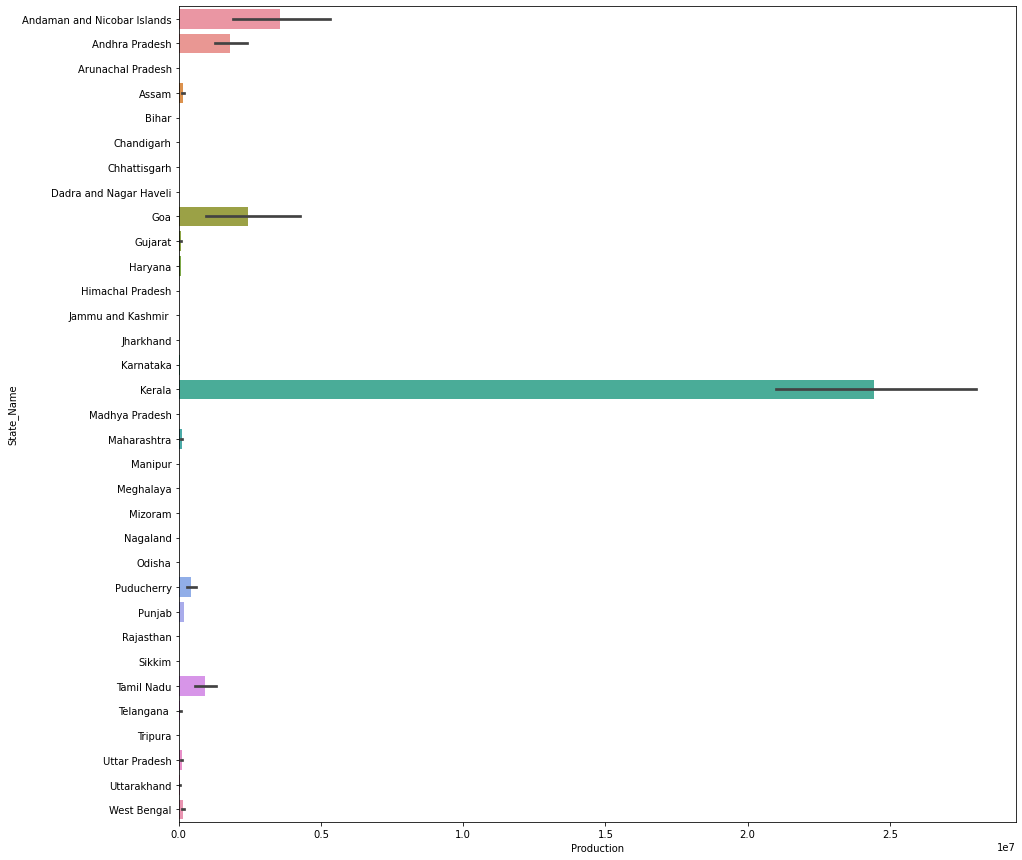

In [42]:
plt.figure(figsize= (15,15))
sns.barplot(x=crop_df['Production'],y= crop_df["State_Name"], orient='h');

Kerala is top state when we look at the quantum of Production for last 19.years.

### Exploratory Data Analysis

In [43]:
crop_df.describe()

,Crop_Year,Area,Production
count,242361.000000,2.423610e+05,2.423610e+05
mean,2005.625773,1.216741e+04,5.825034e+05
std,4.958285,5.085744e+04,1.706581e+07
min,1997.000000,1.000000e-01,0.000000e+00
25%,2002.000000,8.700000e+01,8.800000e+01
50%,2006.000000,6.030000e+02,7.290000e+02
75%,2010.000000,4.545000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


### Introducing New Vaiable 
##### Different Zones(Union Terr, South Zone, NE Zone, East Zone, North Zone, Central Zone and West Zone)
##### Different categories (Cereal, Pulses,Fruits,Beans,Vegetables, Spices, fibers, Nuts, Natural Polymer,Coffee, Tea, Total foodgrain, Pulses, Oilseeds, Paddy, Commercial, Sugarcane, forage plants and Others)<b>

In [44]:
#Zone-Wise Production - 1997-2015
north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

In [45]:
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip()  in east_india:
        val = 'East Zone'
    elif row['State_Name'].strip()  in west_india:
        val = 'West Zone'
    elif row['State_Name'].strip()  in central_india:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['State_Name'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val


crop_df['Zones'] = crop_df.apply(get_zonal_names, axis=1)
crop_df['Zones'].unique()

array(['Union Terr', 'South Zone', 'NE Zone', 'East Zone', 'North Zone',
       'Central Zone', 'West Zone'], dtype=object)

In [46]:
crop_df.Zones.value_counts()

South Zone      53500
North Zone      49874
East Zone       43261
West Zone       33134
Central Zone    32972
NE Zone         28284
Union Terr       1336
Name: Zones, dtype: int64

Observations:
    Top zones are South India, North India and East India

In [47]:
crop=crop_df['Crop']
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

crop_df['cat_crop']=crop_df['Crop'].apply(cat_crop)

In [48]:
crop_df["cat_crop"].value_counts()

Cereal        63283
Pulses        40898
oilseeds      33801
Vegetables    23154
spices        21638
Nuts          11472
Commercial    10561
fibres         9785
Beans          9115
Fruits         6153
Name: cat_crop, dtype: int64

Observations : Top crop by frequency are Cereals, Pulses, oilseeds, Vegetables

In [49]:
crop_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Union Terr,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Union Terr,Pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Union Terr,Cereal
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Union Terr,Fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Union Terr,Nuts


In [50]:
crop_df.to_csv('crop.csv')

## Visualization of Important Variables

### 1. Zonal distribution of crops:

In [63]:
crop_df.Zones.value_counts()

South Zone      53500
North Zone      49874
East Zone       43261
West Zone       33134
Central Zone    32972
NE Zone         28284
Union Terr       1336
Name: Zones, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Zone-Wise Production: Total')

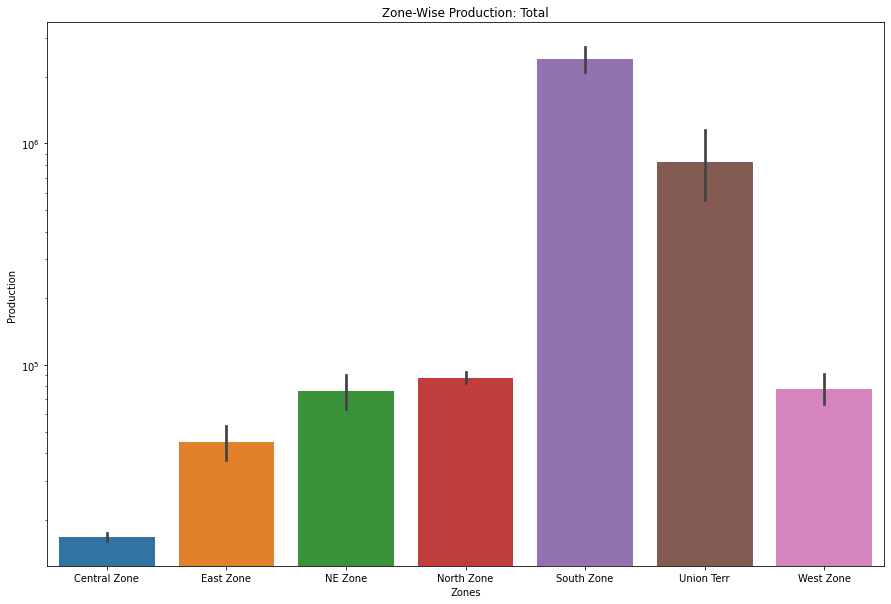

In [51]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(crop_df.Zones.sort_values(ascending=True), crop_df.Production)
plt.yscale('log')
plt.title('Zone-Wise Production: Total')

Top Zone is South India by production 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Southern-Zone Production')

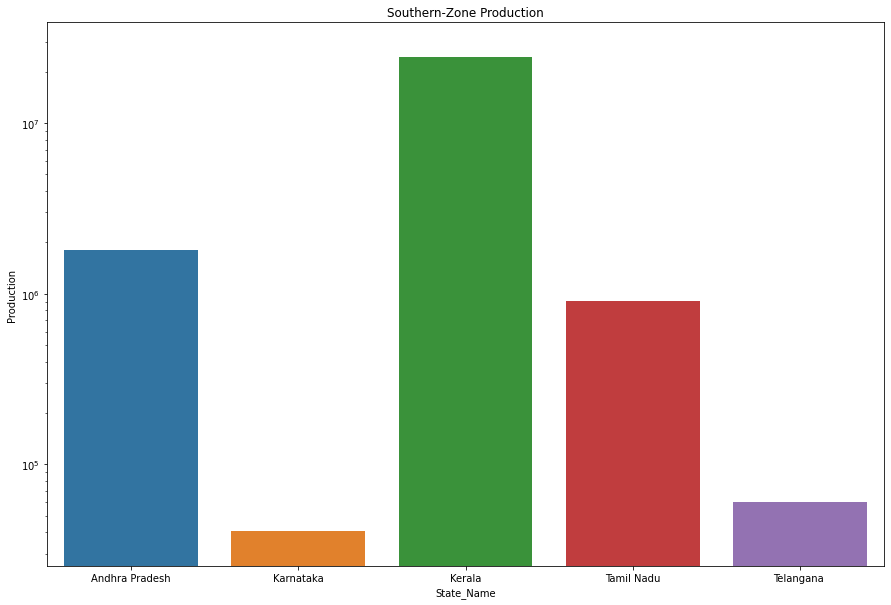

In [52]:
south_zone = crop_df[(crop_df["Zones"] == 'South Zone')]
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(south_zone.State_Name, south_zone.Production,errwidth=0)
plt.yscale('log')
plt.title('Southern-Zone Production')

Top South Indian states are Kerala, Andhra Pradesh and Tamil Nadu

### 2. Crop Wise Production Status

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Overall Crops vs Production')

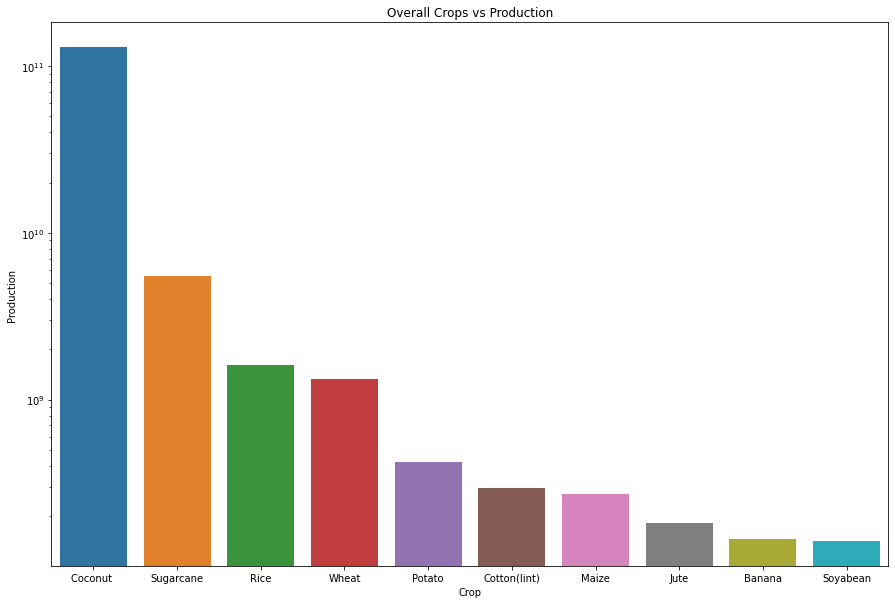

In [53]:
# Overall Crop Production
crop = crop_df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
crop 
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(crop.Crop, crop.Production)
plt.yscale('log')
plt.title('Overall Crops vs Production')

Top Crops Production wise are: Coconut, Sugarcane and Rice

### 3. Yearwise Production Status:
    

<AxesSubplot:xlabel='Crop_Year'>

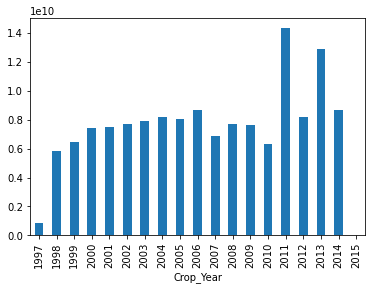

In [54]:
plt.tick_params(labelsize=10)
crop_df.groupby("Crop_Year")["Production"].agg("sum").plot.bar()

High productive years are 2011, 2013 and 2014.

### 4. Season wise Production Status

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Seasonal Crops vs Production')

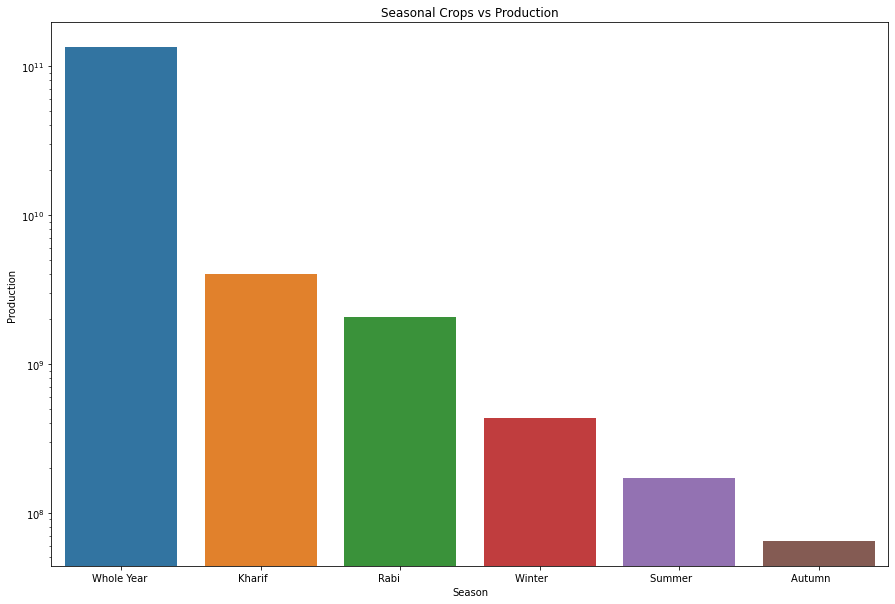

In [55]:
# Season vs Production
df_season=crop_df.copy()
season = df_season.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
season
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(season.Season, season.Production,errwidth=0)
plt.yscale('log')
plt.title('Seasonal Crops vs Production')

* Top crop categories which shows high production values are Whole Year(Annual growing plants), Kharif and Rabi crops. It clearly shows these crops heavily dependent on seasonal monsoons.

### 5. Crop wise production plot describing production values for all crop types.

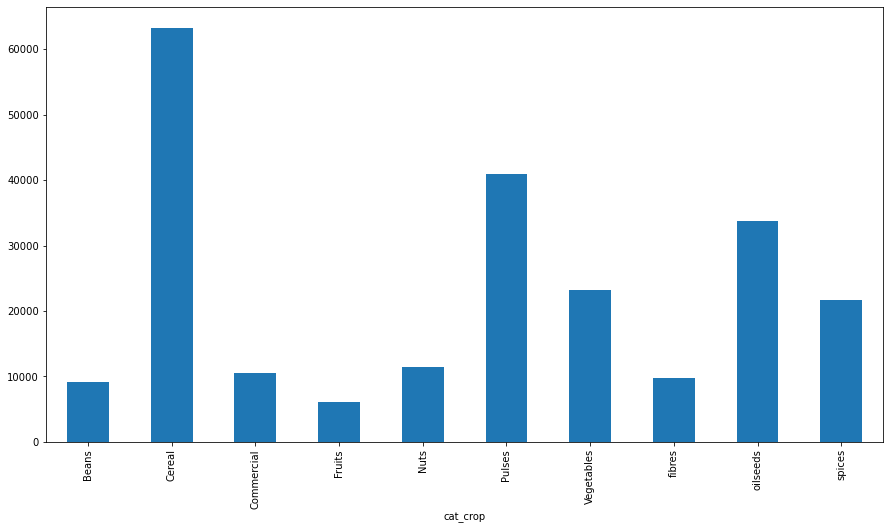

In [56]:
plt.figure(figsize=(15,8))
plt.tick_params(labelsize=10)
crop_df.groupby("cat_crop")["Production"].agg("count").plot.bar()
plt.show()

Top crop categories are Cereal, Pulses and Oilseeds.

### 6. State versus Crop Category versus Season plot:

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


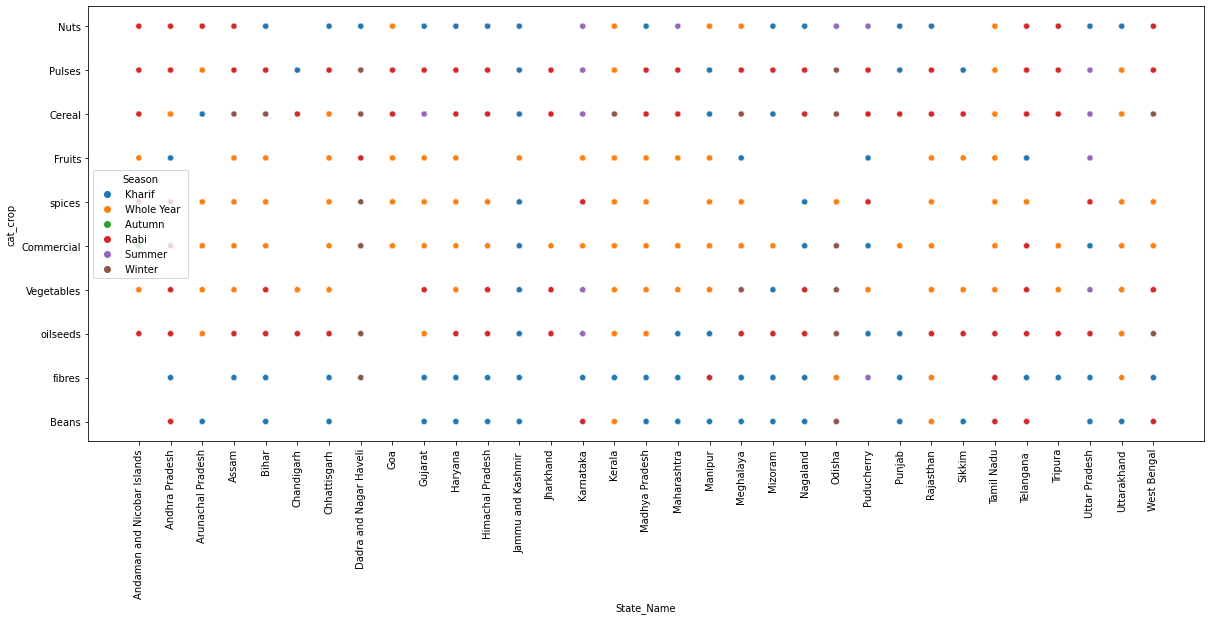

In [57]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=crop_df,x="State_Name",y="cat_crop",hue="Season")
plt.xticks(rotation=90)
plt.show()

* South zone: i. Top producing state Kerala shows a abundance of whole year seasonal crops
* North Zone: ii. Top producing state Uttar Pradesh shows abundance of Kharif, Rabi and Summar crops

### 7. Different proportion of Crop Categories for India

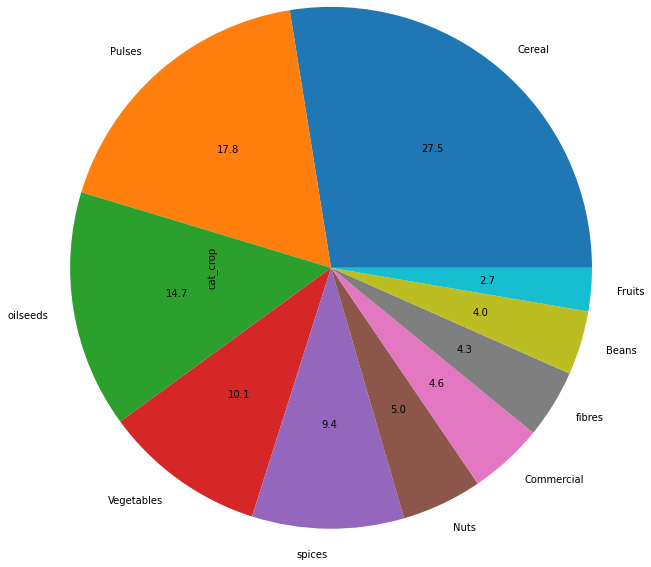

In [58]:
df1=crop_df["cat_crop"].value_counts()
df1.plot(radius=3,kind="pie",autopct="%1.1f",pctdistance=0.6)
plt.tick_params(labelsize=10)